In [75]:
import numpy as np
import torch
import math
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
from skimage import data

In [193]:
U_1 = torch.tensor(np.array(Image.open('cuadro1_005.bmp').convert('L')))
U_2 = torch.tensor(np.array(Image.open('trackedCell15.tif').convert('L')))
print("max value ", torch.min(U_1))
output_path = "salida.png"
#example for writing image
Y = torch.zeros(U_1.shape)
Y_pil = Image.fromarray(Y.numpy().astype(np.uint8))
Y_pil.save(output_path)



max value  tensor(136, dtype=torch.uint8)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


<BarContainer object of 256 artists>

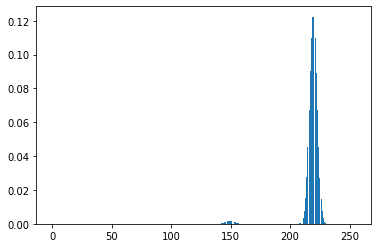

In [331]:
#Calculo histograma

h = np.histogram(U_1, [i for i in range(0,257)], normed=True)
plt.bar([i for i in range(0, 256)], h[0])

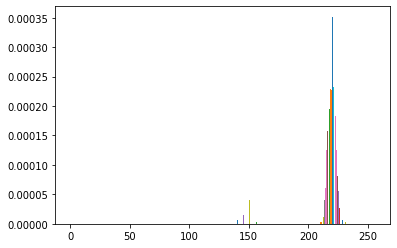

In [147]:
# weights = torch.ones_like(U_1) / (U_1.shape[0]*U_1.shape[1])

# h_z,z_bin,_ = plt.hist(U_1, bins=[i for i in range(0,257)], weights=weights)

In [332]:
#Calculo funcion J(T) con numpy

def calcJ(T, histogram):
  P_1 = sum(histogram[0][:T])
  P_2 = 1 - P_1

  mu_1 = np.matmul(histogram[0][:T], np.array(range(0,T), dtype=float)) / P_1  
  mu_2 = np.matmul(histogram[0][T:], np.array(range(T,256), dtype=float)) / P_2
    
  sigma_1 = np.sqrt(np.matmul(histogram[0][:T], (np.array(range(0,T), dtype=float)-mu_1)**2) / P_1)
  sigma_2 = np.sqrt(np.matmul(histogram[0][T:], (np.array(range(T,256), dtype=float)-mu_2)**2) / P_2)

  J_t = 1 + 2*(P_1*np.log(sigma_1)+P_2*np.log(sigma_2))-2*(P_1*np.log(P_1)+P_2*np.log(P_2))


  return J_t

In [333]:
#Lista valores de la funcion J(T)

list_j = []
for T in range(1,255):
  list_j += [calcJ(T, h)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


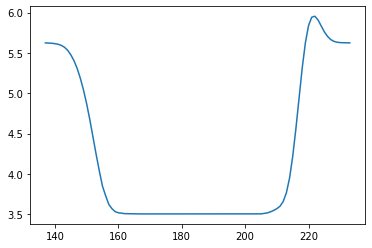

In [334]:
#Grafica funcion J(T)
plt.plot(list_j)

In [325]:
#Calula umbral optimo (suponiendo que puede haber un infinito antes del valor minimo

def calcThreshold(list_j):
  thresh1 = np.nanargmin(list_j)
  if list_j[thresh1] == -np.inf:
    list_j = list_j[thresh1+1:]
    thresh_true = np.nanargmin(list_j)
    return thresh_true + thresh1+1
  else:
    return thresh1

  

In [335]:
thresh = calcThreshold(list_j)
print(thresh)

166


In [336]:
#Parametros especficos

P_1 = sum(h[0][:thresh])
P_2 = 1 - P_1

mu_1 = np.matmul(h[0][:thresh], np.array(range(0,thresh), dtype=float)) / P_1  
print("mu_1 = ", mu_1)
mu_2 = np.matmul(h[0][thresh:], np.array(range(thresh,256), dtype=float)) / P_2
print("mu_2 = ", mu_2)   

sigma_1 = np.matmul(h[0][:thresh], (np.array(range(0,thresh), dtype=float)-mu_1)**2) / P_1
print("sigma_sqrt_1 = ", sigma_1)
sigma_2 = np.matmul(h[0][thresh:], (np.array(range(thresh,256), dtype=float)-mu_2)**2) / P_2
print("sigma_sqrt_2 = ", sigma_2)

mu_1 =  149.44923780487807
mu_2 =  219.49250785371348
sigma_sqrt_1 =  15.326996370278113
sigma_sqrt_2 =  10.063144033709287


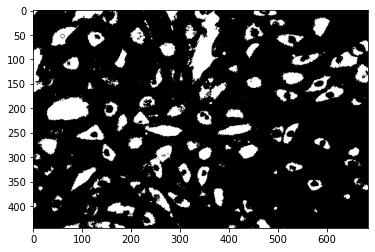

In [255]:
#Umbralizacion y #Guardar imagen umbralizada

#binary = U_1 < thresh
binary = U_2 > thresh
plt.imshow(binary, cmap=plt.cm.gray)
#plt.imsave('test.png', binary, cmap=plt.cm.gray)

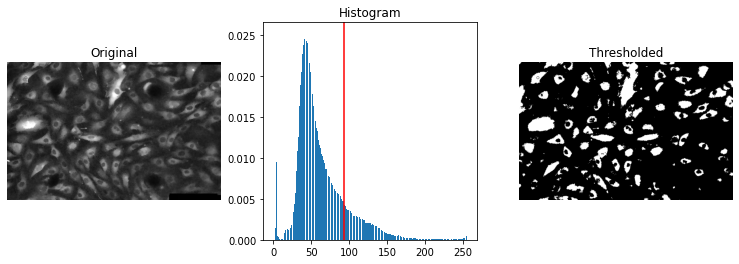

In [257]:
#Graficos

fig, axes = plt.subplots(ncols=3, figsize=(13, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(U_2, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].bar([i for i in range(0, 256)], h[0])
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

SEGUNDA PARTE | SECCION B

In [258]:
#Threshold for variance (trabajo futuro, crear humbral minimo de dispersion para distinguir particiones uniformes)

# thresh[0]
# h = np.histogram(U_2, [i for i in range(0,257)], normed=True)
# plt.bar([i for i in range(0, 256)], h[0])

# P_1 = sum(h[0][:thresh])
# P_2 = 1 - P_1

# mu_1 = np.matmul(h[0][:255], np.array(range(0,255), dtype=float)) / P_1  
# print("mu_1 = ", mu_1)
# mu_2 = np.matmul(h[0][thresh:], np.array(range(thresh,256), dtype=float)) / P_2
# print("mu_2 = ", mu_2)   

# sigma_1 = np.matmul(h[0][:thresh], (np.array(range(0,thresh), dtype=float)-mu_1)**2) / P_1
# print("sigma_sqrt_1 = ", sigma_1)
# sigma_2 = np.matmul(h[0][thresh:], (np.array(range(thresh,256), dtype=float)-mu_2)**2) / P_2

In [327]:
#Partir imagen

partitions = ()

t = U_2.split(91) #divide las filas
for part in t:
  partitions += part.split(126, dim=-1) #divide las columnas

In [328]:
#Caluclo del algoritmo "mejorado"

threshold = []
for partition in partitions: 
  hist = np.histogram(partition, [i for i in range(0,257)], normed=True)
  list_j = []
  for T in range(1,255):
    list_j += [calcJ(T, hist)]
  threshold += [calcThreshold(list_j)]

threshold = [x for x in threshold if x != 0]

optimum_threshold = round(np.mean(threshold))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
/usr/local/lib/python3.7/dist-package

In [329]:
print("Umbral optimo, ", optimum_threshold)

Umbral optimo,  126


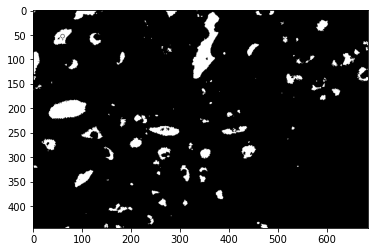

In [266]:
#Umbralizacion y #Guardar imagen umbralizada

#binary = U_1 < thresh
binary_2 = U_2 > optimum_threshold
plt.imshow(binary_2, cmap=plt.cm.gray)
#plt.imsave('test.png', binary, cmap=plt.cm.gray)

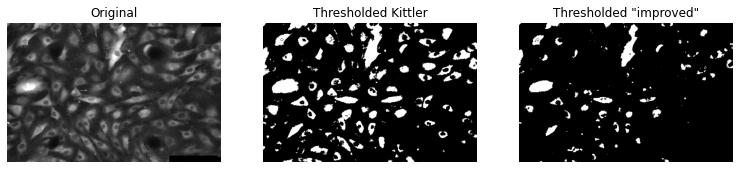

In [267]:
#Graficos

fig, axes = plt.subplots(ncols=3, figsize=(13, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(U_2, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Thresholded Kittler')
ax[1].axis('off')

ax[2].imshow(binary_2, cmap=plt.cm.gray)
ax[2].set_title('Thresholded "improved"')
ax[2].axis('off')

plt.show()